In [5]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
import regions
from regions import Regions


In [23]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [24]:
from jwst_plots import make_cat_use, JWSTCatalog
import cutout_manager as cm

In [25]:
cd notebooks/

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [9]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

# Select catalog in region around cloud c

In [7]:
cat_use = make_cat_use()

In [48]:
ctr = SkyCoord(0.37759106, 0.05066064, unit=(u.deg, u.deg), frame='galactic').icrs #reg[0].center.galactic
width = 125.2066*u.arcsec #reg[0].width
height = 99.9212*u.arcsec #reg[0].height


In [54]:
cutout_405 = cm.get_cutout_405(ctr, width, height)
reg = regions.RectangleSkyRegion(center=ctr, width=height, height=width)
basetable = cat_use.table_region_mask([reg], cutout_405.wcs)
cat_use_in = JWSTCatalog(basetable)

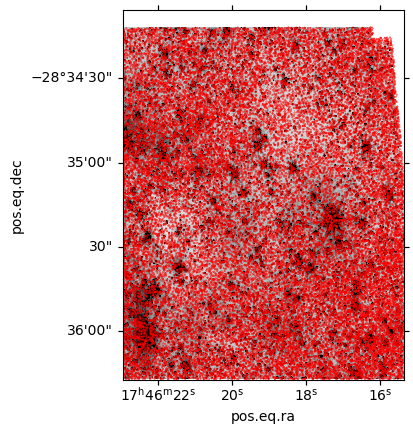

In [55]:
ax = plt.subplot(projection=cutout_405.wcs)
ax.imshow(cutout_405.data, origin='lower', cmap='Greys', vmin=0, vmax=25)
ax.scatter(basetable['skycoord_ref'].ra, basetable['skycoord_ref'].dec, transform=ax.get_transform('world'), s=0.1, edgecolor='r', facecolor='none')

# CMD

<Axes: xlabel='F187N - F405N', ylabel='F187N'>

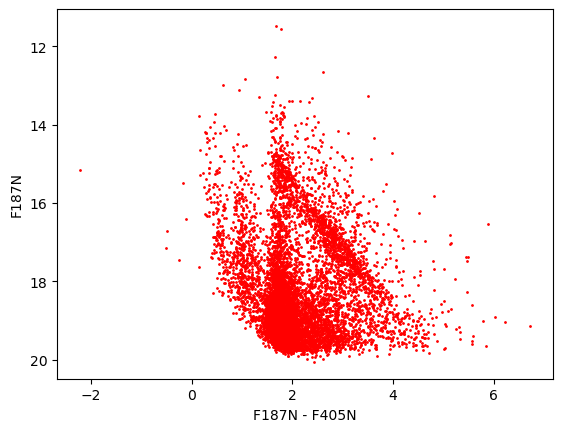

In [57]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, color='r', s=1)

<Axes: xlabel='F212N - F466N', ylabel='F212N'>

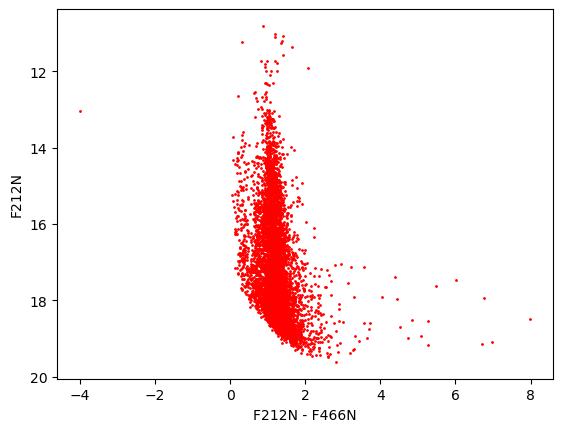

In [58]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f212n', 'f466n', 'f212n', ax=ax, color='r', s=1)

(-0.5, 2.0)

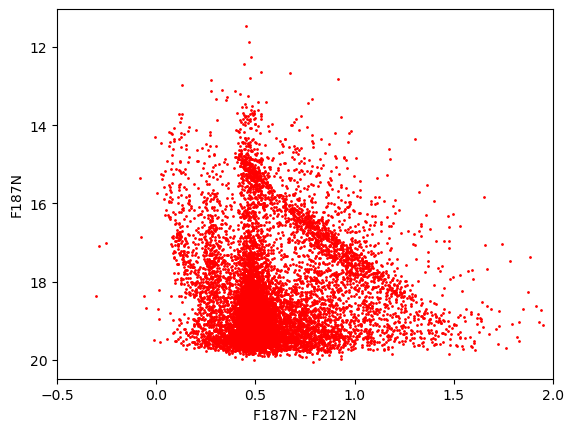

In [60]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f212n', 'f187n', ax=ax, color='r', s=1)
ax.set_xlim(-0.5, 2)

(-0.5, 2.0)

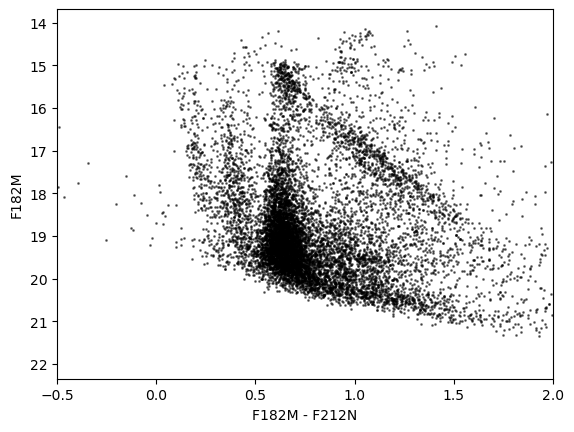

In [126]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f182m', 'f212n', 'f182m', ax=ax, color='k', s=1, alpha=0.5)
ax.set_xlim(-0.5, 2)

(-0.5, 2.0)

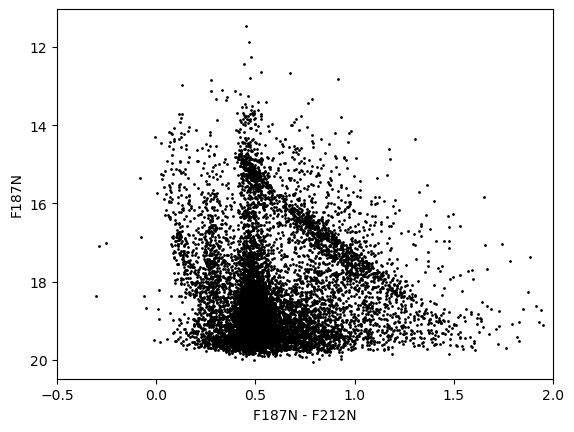

In [145]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f212n', 'f187n', ax=ax, color='k', s=1)#, alpha=0.5)
ax.set_xlim(-0.5, 2)
#ax.set_xlim(0.7, 1)

(-3.0, 5.471990983989685)

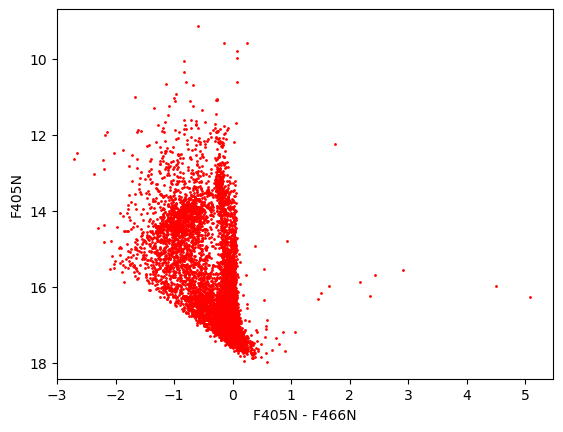

In [63]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f405n', 'f466n', 'f405n', ax=ax, color='r', s=1)
ax.set_xlim(-3)

(-3.0, 5.914124206582766)

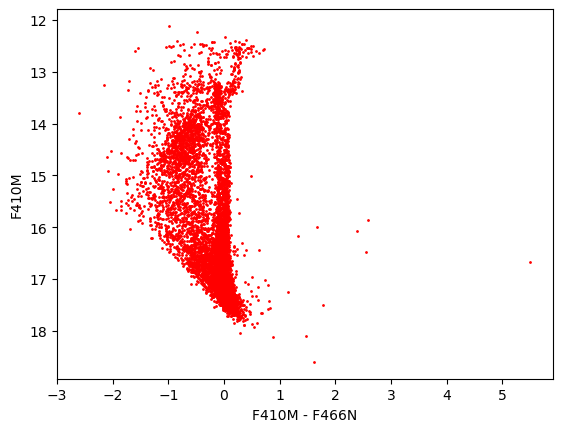

In [64]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f410m', 'f466n', 'f410m', ax=ax, color='r', s=1)
ax.set_xlim(-3)

(-3.0, 7.8492401258713835)

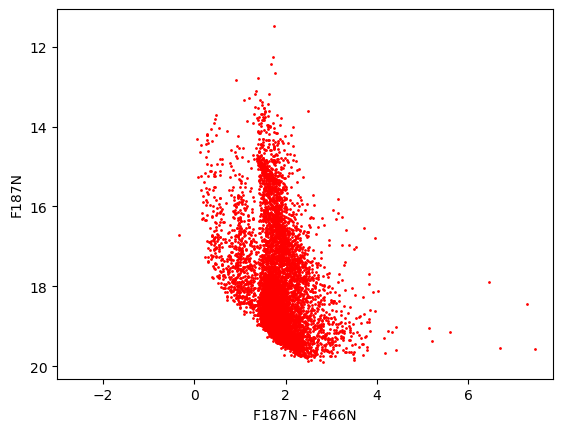

In [66]:
ax = plt.subplot(111)
cat_use_in.plot_CMD('f187n', 'f466n', 'f187n', ax=ax, color='r', s=1)
ax.set_xlim(-3)

# CCD

<Axes: xlabel='F405N - F466N', ylabel='F212N - F466N'>

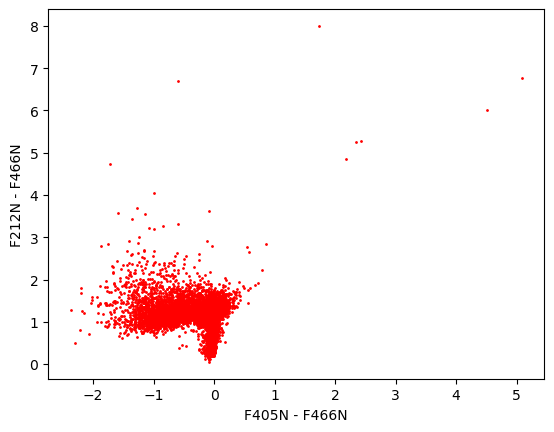

In [68]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f405n', 'f466n', 'f212n', 'f466n', ax=ax, color='r', s=1)

<Axes: xlabel='F410M - F466N', ylabel='F182M - F466N'>

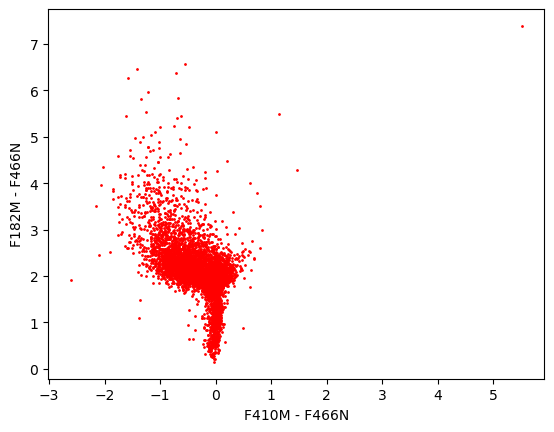

In [69]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f410m', 'f466n', 'f182m', 'f466n', ax=ax, color='r', s=1)

<Axes: xlabel='F410M - F466N', ylabel='F182M - F466N'>

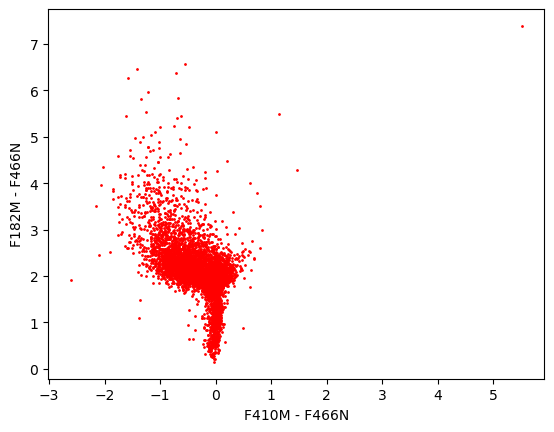

In [ ]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f410m', 'f466n', 'f182m', 'f466n', ax=ax, color='r', s=1)

<Axes: xlabel='F182M - F212N', ylabel='F212N - F410M'>

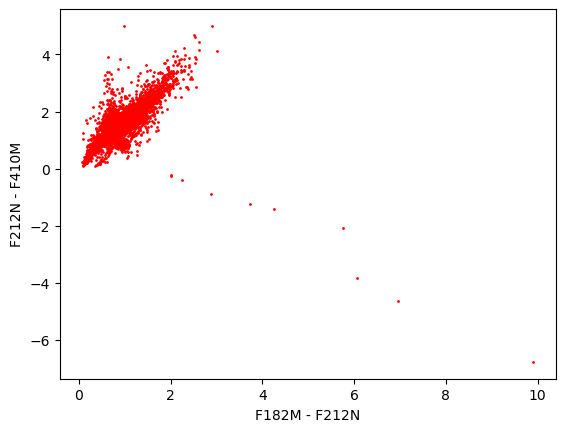

In [73]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f182m', 'f212n', 'f212n', 'f410m', ax=ax, color='r', s=1)

(-1.0, 5.0)

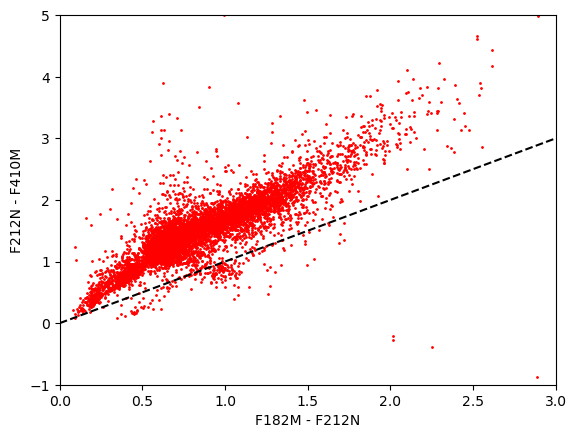

In [77]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f182m', 'f212n', 'f212n', 'f410m', ax=ax, color='r', s=1)
ax.plot([0, 3], [0, 3], 'k--')
ax.set_xlim(0, 3)
ax.set_ylim(-1, 5)

<Axes: xlabel='F182M - F212N', ylabel='F410M - F466N'>

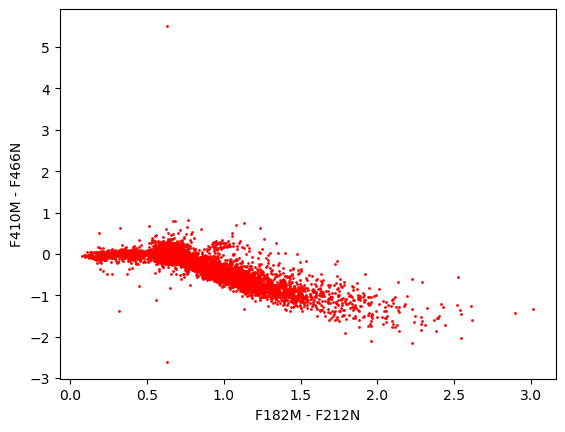

In [72]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax, color='r', s=1)

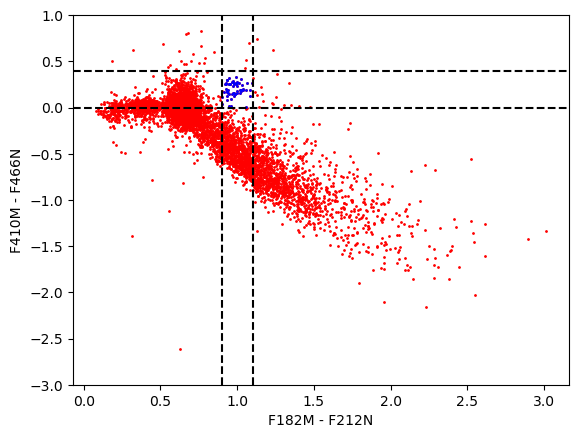

In [113]:
ax = plt.subplot(111)
cat_use_in.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax, color='r', s=1, alpha=1)
ax.set_ylim(-3, 1)
ax.axhline(0, color='k', linestyle='--')
ax.axhline(0.4, color='k', linestyle='--')
ax.axvline(0.9, color='k', linestyle='--')
ax.axvline(1.1, color='k', linestyle='--')
mask = (cat_use_in.color('f182m', 'f212n') > 0.9) & (cat_use_in.color('f182m', 'f212n') < 1.1) 
mask = mask & (cat_use_in.color('f410m', 'f466n') > 0) & (cat_use_in.color('f410m', 'f466n') < 0.4)
ax.scatter(cat_use_in.color('f182m', 'f212n')[mask], cat_use_in.color('f410m', 'f466n')[mask], color='b', s=1)

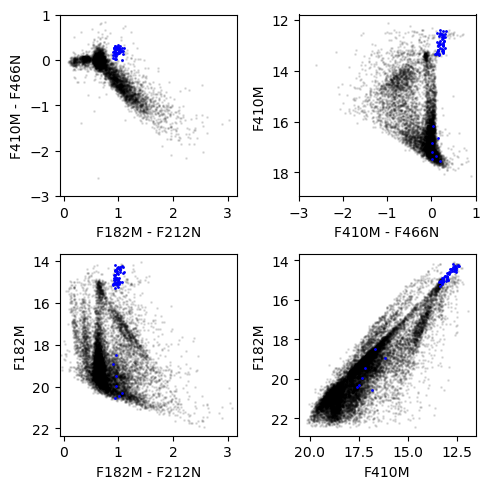

In [115]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(221)
cat_use_in.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax, color='k', s=1, alpha=0.1)
ax.scatter(cat_use_in.color('f182m', 'f212n')[mask], cat_use_in.color('f410m', 'f466n')[mask], color='b', s=1)
ax.set_ylim(-3, 1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax2 = plt.subplot(223)
cat_use_in.plot_CMD('f182m', 'f212n', 'f182m', ax=ax2, color='k', s=1, alpha=0.1)
ax2.scatter(cat_use_in.color('f182m', 'f212n')[mask], cat_use_in.band('f182m')[mask], color='b', s=1)
ax2.set_xlim(xlim)

ax3 = plt.subplot(222)
cat_use_in.plot_CMD('f410m', 'f466n', 'f410m', ax=ax3, color='k', s=1, alpha=0.1)
ax3.scatter(cat_use_in.color('f410m', 'f466n')[mask], cat_use_in.band('f410m')[mask], color='b', s=1)
ax3.set_xlim(ylim)

ax4 = plt.subplot(224)
cat_use_in.plot_MMD('f410m', 'f182m', ax=ax4, color='k', s=1, alpha=0.1)
ax4.scatter(cat_use_in.band('f410m')[mask], cat_use_in.band('f182m')[mask], color='b', s=1)


plt.tight_layout()

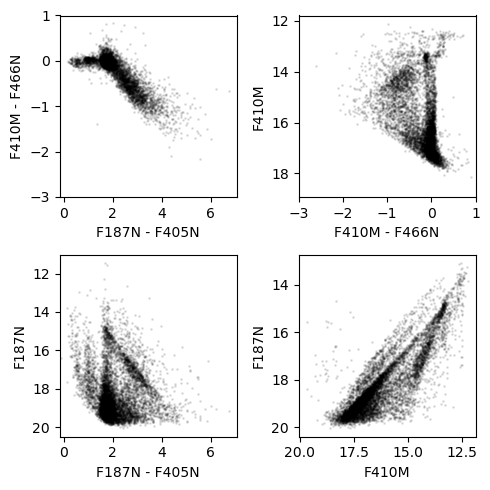

In [274]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(221)
cat_use_in.plot_CCD('f187n', 'f405n', 'f410m', 'f466n', ax=ax, color='k', s=1, alpha=0.1)
#ax.scatter(cat_use_in.color('f182m', 'f212n')[mask], cat_use_in.color('f410m', 'f466n')[mask], color='b', s=1)
ax.set_ylim(-3, 1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax2 = plt.subplot(223)
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax2, color='k', s=1, alpha=0.1)
#ax2.scatter(cat_use_in.color('f182m', 'f212n')[mask], cat_use_in.band('f182m')[mask], color='b', s=1)
ax2.set_xlim(xlim)

ax3 = plt.subplot(222)
cat_use_in.plot_CMD('f410m', 'f466n', 'f410m', ax=ax3, color='k', s=1, alpha=0.1)
#ax3.scatter(cat_use_in.color('f410m', 'f466n')[mask], cat_use_in.band('f410m')[mask], color='b', s=1)
ax3.set_xlim(ylim)

ax4 = plt.subplot(224)
cat_use_in.plot_MMD('f410m', 'f187n', ax=ax4, color='k', s=1, alpha=0.1)
#ax4.scatter(cat_use_in.band('f410m')[mask], cat_use_in.band('f182m')[mask], color='b', s=1)


plt.tight_layout()

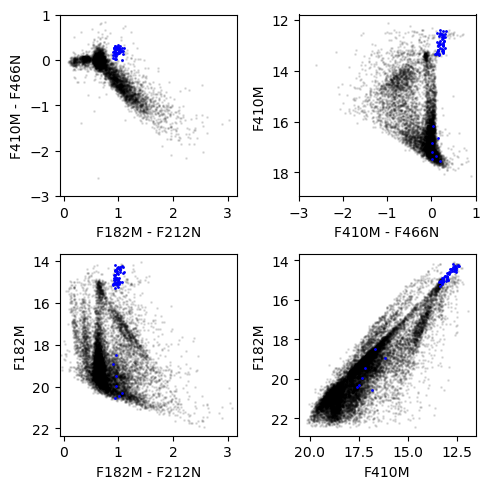

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(221)
cat_use_in.plot_CCD('x', 'f212n', 'f410m', 'f466n', ax=ax, color='k', s=1, alpha=0.1)
ax.scatter(cat_use_in.color('f182m', 'f212n')[mask], cat_use_in.color('f410m', 'f466n')[mask], color='b', s=1)
ax.set_ylim(-3, 1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax2 = plt.subplot(223)
cat_use_in.plot_CMD('f182m', 'f212n', 'f182m', ax=ax2, color='k', s=1, alpha=0.1)
ax2.scatter(cat_use_in.color('f182m', 'f212n')[mask], cat_use_in.band('f182m')[mask], color='b', s=1)
ax2.set_xlim(xlim)

ax3 = plt.subplot(222)
cat_use_in.plot_CMD('f410m', 'f466n', 'f410m', ax=ax3, color='k', s=1, alpha=0.1)
ax3.scatter(cat_use_in.color('f410m', 'f466n')[mask], cat_use_in.band('f410m')[mask], color='b', s=1)
ax3.set_xlim(ylim)

ax4 = plt.subplot(224)
cat_use_in.plot_MMD('f410m', 'f182m', ax=ax4, color='k', s=1, alpha=0.1)
ax4.scatter(cat_use_in.band('f410m')[mask], cat_use_in.band('f182m')[mask], color='b', s=1)


plt.tight_layout()

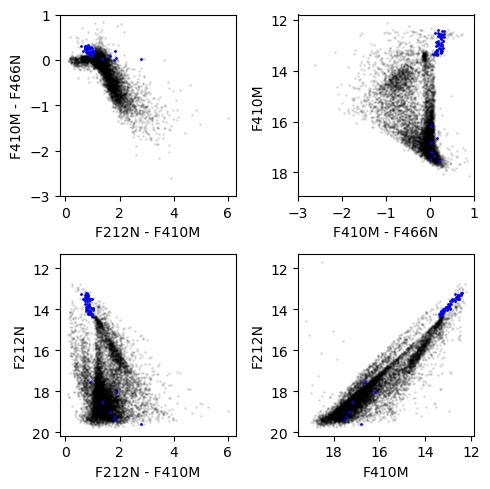

In [118]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(221)
cat_use_in.plot_CCD('f212n', 'f410m', 'f410m', 'f466n', ax=ax, color='k', s=1, alpha=0.1)
ax.scatter(cat_use_in.color('f212n', 'f410m')[mask], cat_use_in.color('f410m', 'f466n')[mask], color='b', s=1)
ax.set_ylim(-3, 1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax2 = plt.subplot(223)
cat_use_in.plot_CMD('f212n', 'f410m', 'f212n', ax=ax2, color='k', s=1, alpha=0.1)
ax2.scatter(cat_use_in.color('f212n', 'f410m')[mask], cat_use_in.band('f212n')[mask], color='b', s=1)
ax2.set_xlim(xlim)

ax3 = plt.subplot(222)
cat_use_in.plot_CMD('f410m', 'f466n', 'f410m', ax=ax3, color='k', s=1, alpha=0.1)
ax3.scatter(cat_use_in.color('f410m', 'f466n')[mask], cat_use_in.band('f410m')[mask], color='b', s=1)
ax3.set_xlim(ylim)

ax4 = plt.subplot(224)
cat_use_in.plot_MMD('f410m', 'f212n', ax=ax4, color='k', s=1, alpha=0.1)
ax4.scatter(cat_use_in.band('f410m')[mask], cat_use_in.band('f212n')[mask], color='b', s=1)


plt.tight_layout()

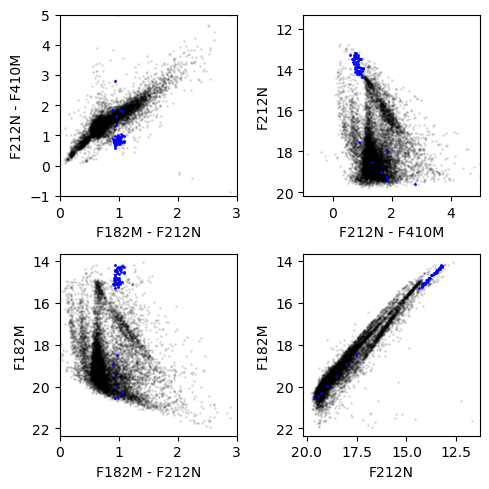

In [122]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(221)
cat_use_in.plot_CCD('f182m', 'f212n', 'f212n', 'f410m', ax=ax, color='k', s=1, alpha=0.1)
ax.scatter(cat_use_in.color('f182m', 'f212n')[mask], cat_use_in.color('f212n', 'f410m')[mask], color='b', s=1)
ax.set_xlim(0, 3)
ax.set_ylim(-1, 5)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax2 = plt.subplot(223)
cat_use_in.plot_CMD('f182m', 'f212n', 'f182m', ax=ax2, color='k', s=1, alpha=0.1)
ax2.scatter(cat_use_in.color('f182m', 'f212n')[mask], cat_use_in.band('f182m')[mask], color='b', s=1)
ax2.set_xlim(xlim)

ax3 = plt.subplot(222)
cat_use_in.plot_CMD('f212n', 'f410m', 'f212n', ax=ax3, color='k', s=1, alpha=0.1)
ax3.scatter(cat_use_in.color('f212n', 'f410m')[mask], cat_use_in.band('f212n')[mask], color='b', s=1)
ax3.set_xlim(ylim)

ax4 = plt.subplot(224)
cat_use_in.plot_MMD('f212n', 'f182m', ax=ax4, color='k', s=1, alpha=0.1)
ax4.scatter(cat_use_in.band('f212n')[mask], cat_use_in.band('f182m')[mask], color='b', s=1)


plt.tight_layout()

# Dereddened Counts

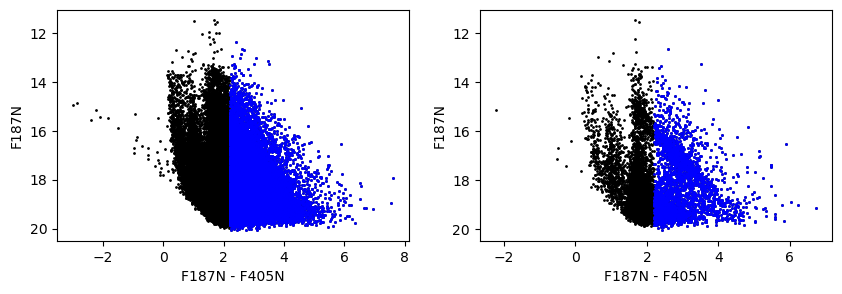

In [228]:
fig = plt.figure(figsize=(10, 3))

ax = plt.subplot(121)
cat_use.plot_CMD('f187n', 'f405n', 'f187n', ax=ax, color='k', s=1)
mask = (cat_use.color('f187n', 'f405n') > 2.2) & (~cat_use.color('f187n', 'f405n').mask)
ax.scatter(cat_use.color('f187n', 'f405n')[mask], cat_use.band('f187n')[mask], color='b', s=1) 

ax2 = plt.subplot(122)
cat_use_in.plot_CMD('f187n', 'f405n', 'f187n', ax=ax2, color='k', s=1)
mask_in = (cat_use_in.color('f187n', 'f405n') > 2.2) & (~cat_use_in.color('f187n', 'f405n').mask)
ax2.scatter(cat_use_in.color('f187n', 'f405n')[mask_in], cat_use_in.band('f187n')[mask_in], color='b', s=1)

In [320]:
cent = SkyCoord(0.3804863756, 0.0445509667, unit=(u.deg, u.deg), frame='galactic').icrs
wid = 8.2455306834*u.arcmin
hei = 108.4510685949*u.arcsec
reg_2 = regions.RectangleSkyRegion(center=ctr, width=hei, height=wid)
cat_use_2 = JWSTCatalog(cat_use.table_region_mask([reg_2], cutout_405.wcs))

mask = (cat_use_2.color('f187n', 'f405n') > 2.2) & (~cat_use_2.color('f187n', 'f405n').mask)
control_cent = SkyCoord(0.4373695305, 0.0676671583, unit=(u.deg, u.deg), frame='galactic').icrs
widt = 45*u.arcsec
heig = 90*u.arcsec
reg_control = regions.RectangleSkyRegion(center=control_cent, width=heig, height=widt)
cat_use_control = JWSTCatalog(cat_use.table_region_mask([reg_control], cutout_405.wcs))
mask_control = cat_use_control.color('f187n', 'f405n') > 2.2

basetable = cat_use_2.catalog[mask]
basetable_in = cat_use_in.catalog[mask_in]
basetable_control = cat_use_control.catalog[mask_control]

In [325]:
from dust_extinction.averages import CT06_MWGC
av182410 = (basetable['mag_ab_f182m'] - basetable['mag_ab_f410m']) / (CT06_MWGC()(1.82*u.um) - CT06_MWGC()(4.10*u.um))
a182 = CT06_MWGC()(1.82*u.um)
f182mdr = basetable['mag_ab_f182m'] - a182 * av182410

In [328]:
a466 = CT06_MWGC()(4.66*u.um)
f466ndr = basetable['mag_ab_f466n'] - a466 * av182410

In [321]:
from dust_extinction.averages import CT06_MWGC
av187405 = (basetable['mag_ab_f187n'] - basetable['mag_ab_f405n']) / (CT06_MWGC()(1.87*u.um) - CT06_MWGC()(4.05*u.um))
a187 = CT06_MWGC()(1.87*u.um)
f187mdr = basetable['mag_ab_f187n'] - a187 * av187405

av187405_in = (basetable_in['mag_ab_f187n'] - basetable_in['mag_ab_f405n']) / (CT06_MWGC()(1.87*u.um) - CT06_MWGC()(4.05*u.um))
f187mdr_in = basetable_in['mag_ab_f187n'] - a187 * av187405_in

av187405_control = (basetable_control['mag_ab_f187n'] - basetable_control['mag_ab_f405n']) / (CT06_MWGC()(1.87*u.um) - CT06_MWGC()(4.05*u.um))
f187mdr_control = basetable_control['mag_ab_f187n'] - a187 * av187405_control

In [322]:
h, bins = np.histogram(f187mdr, bins=100, range=(10, 18))
h_in, bins = np.histogram(f187mdr_in, bins=bins)
h_control, bins = np.histogram(f187mdr_control, bins=bins)

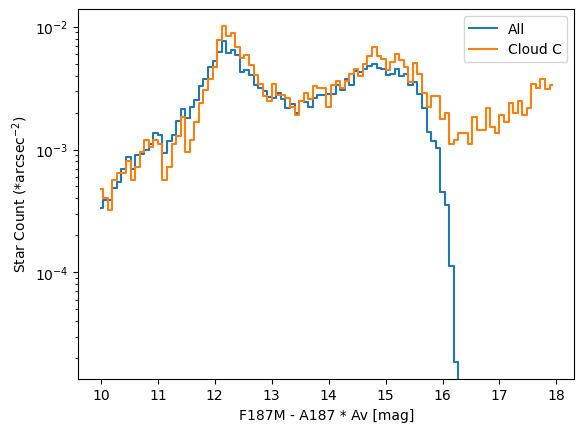

In [323]:
plt.step(bins[:-1], h/(wid*hei).to(u.arcsec**2).value, where='mid', label='All')
plt.step(bins[:-1], h_in/(width*height).to(u.arcsec**2).value, where='mid', label='Cloud C')
#plt.step(bins[:-1], h_control/(widt*heig).value, where='mid', label='Control')
plt.yscale('log')
plt.xlabel('F187M - A187 * Av [mag]')
plt.ylabel(r'Star Count (*arcsec$^{-2}$)')
plt.legend()

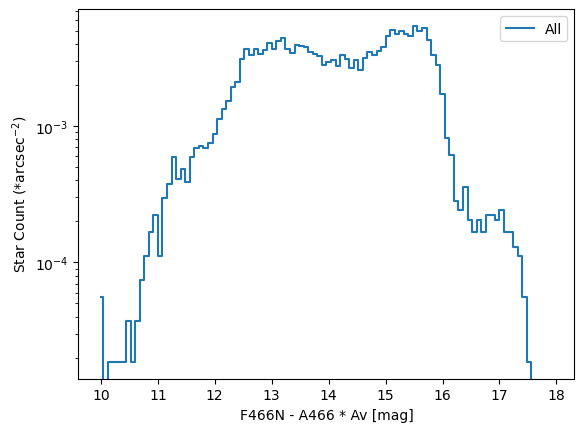

In [330]:
h_466, bins = np.histogram(f466ndr, bins=100, range=(10, 18))

plt.step(bins[:-1], h_466/(wid*hei).to(u.arcsec**2).value, where='mid', label='All')
#plt.step(bins[:-1], h_in/(width*height).to(u.arcsec**2).value, where='mid', label='Cloud C')
#plt.step(bins[:-1], h_control/(widt*heig).value, where='mid', label='Control')
plt.yscale('log')
plt.xlabel('F466N - A466 * Av [mag]')
plt.ylabel(r'Star Count (*arcsec$^{-2}$)')
plt.legend()

In [303]:
basetable[f187mdr > 17]['mag_ab_f405n', 'mag_ab_f187n']

mag_ab_f405n,mag_ab_f187n
float64,float64
--,17.61095094875626
--,18.957262054925522
--,19.776707662094704
--,18.91395686416474
--,17.61894057523068
--,18.512671020617873
--,17.299869963152886
--,18.35623555008125
--,18.996579965023294


In [317]:
x=((basetable[f187mdr > 17]['mag_ab_f187n'] - basetable[f187mdr > 17]['mag_ab_f405n']) )
x.mask[:]=False
x

17.61095094875626
18.957262054925522
19.776707662094704
18.91395686416474
17.61894057523068
18.512671020617873
17.299869963152886
18.35623555008125
18.996579965023294
19.58486064541088
19.536219650039307


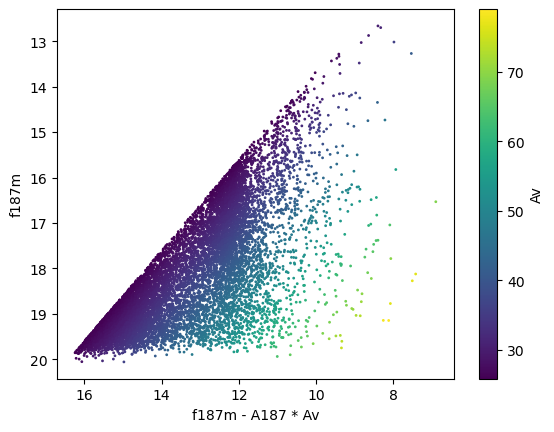

In [299]:
im = plt.scatter(f187mdr, basetable['mag_ab_f187n'], s=1, c=av187405, cmap='viridis')
plt.xlabel('f187m - A187 * Av')
plt.ylabel('f187m')
plt.colorbar(im, label='Av')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

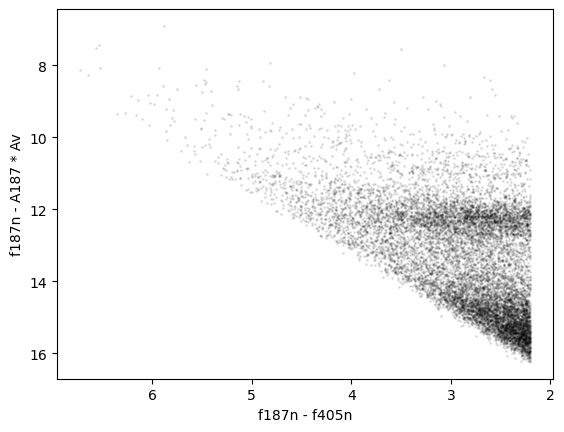

In [300]:
im = plt.scatter(basetable['mag_ab_f187n']-basetable['mag_ab_f405n'], f187mdr, s=1, alpha=0.1, color='k')
#, c=av187405, cmap='viridis')
plt.ylabel('f187n - A187 * Av')
plt.xlabel('f187n - f405n')
#plt.colorbar(im, label='Av')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [301]:
np.min(f187mdr), np.max(f187mdr)

(6.902308776729043, 16.243775272241844)